<a href="https://colab.research.google.com/github/lathamithu/Techvolt-Intern/blob/master/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [152]:
dataset = pd.read_csv("mushrooms.csv")
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [153]:
for label in dataset.columns:
  dataset[label] = LabelEncoder().fit(dataset[label]).transform(dataset[label])

In [154]:
x = dataset.drop(['class'], axis = 1)
y = dataset['class']

**LOGISTIC REGRESSION**

In [155]:
from sklearn.linear_model import LogisticRegression

In [156]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [157]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [158]:
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1272
           1       0.96      0.93      0.94      1166

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



In [159]:
confusion_matrix(y_test, predictions)

array([[1223,   49],
       [  81, 1085]])

In [160]:
accuracy_score(y_test, predictions)

0.9466776045939295

In [161]:
probs = logmodel.predict_proba(X_test)
probs

array([[1.71283675e-01, 8.28716325e-01],
       [8.61081779e-01, 1.38918221e-01],
       [6.55972445e-01, 3.44027555e-01],
       ...,
       [9.05419201e-05, 9.99909458e-01],
       [6.85684183e-02, 9.31431582e-01],
       [3.83036073e-02, 9.61696393e-01]])

In [162]:
from sklearn import metrics

prob_positive  = probs[:,1]      
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print("Area under the curve:", roc_auc)

Area under the curve: 0.9827482280979968


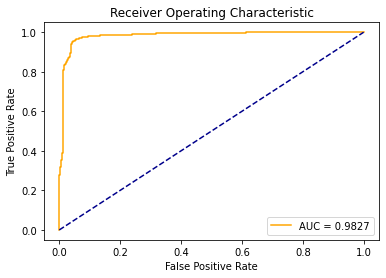

In [163]:
# Plot ROC curve

import matplotlib.pyplot as plt
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], color = 'darkblue', linestyle = '--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**KNN**

In [164]:
from sklearn.neighbors import KNeighborsClassifier

In [165]:
knn = KNeighborsClassifier(n_neighbors = 1)


In [166]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [167]:
pred = knn.predict(X_test)

In [168]:
print(confusion_matrix(y_test,pred))

[[1271    1]
 [   0 1166]]


In [169]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [170]:
error_rate = []



for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

print(error_rate)

[0.00041017227235438887, 0.0, 0.0008203445447087777, 0.0008203445447087777, 0.002050861361771944, 0.002050861361771944, 0.002871205906480722, 0.004101722723543888, 0.004101722723543888, 0.004922067268252666, 0.004101722723543888, 0.005742411812961444, 0.005742411812961444, 0.007383100902378999, 0.006562756357670222, 0.007793273174733388, 0.006562756357670222, 0.007383100902378999, 0.007793273174733388, 0.008613617719442166, 0.008613617719442166, 0.011894995898277276, 0.01066447908121411, 0.013535684987694831, 0.013125512715340444, 0.015176374077112387, 0.015176374077112387, 0.015586546349466776, 0.015586546349466776, 0.01804757998359311, 0.01804757998359311, 0.020098441345365054, 0.018867924528301886, 0.019278096800656275, 0.019278096800656275, 0.022149302707136997, 0.021739130434782608, 0.021739130434782608, 0.022149302707136997]


Text(0, 0.5, 'Error Rate')

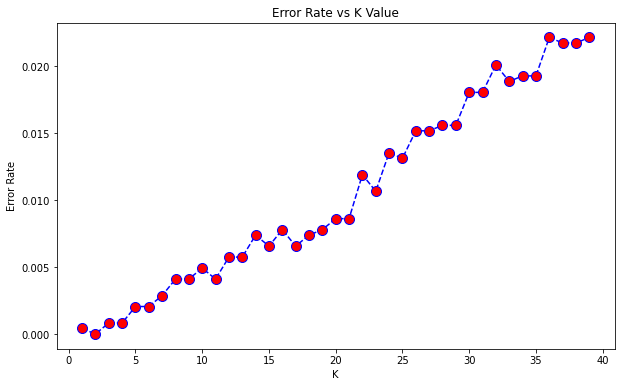

In [171]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


**NAIVE BAYES**

In [172]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [173]:
y_pred = gnb.predict(X_test)
y_pred

array([1, 1, 0, ..., 1, 1, 1])

In [174]:
print('Model accuracy score : {0:0.4f}' . format(accuracy_score(y_test, y_pred)))

Model accuracy score : 0.9151


In [175]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0,0])

print('\nTrue Negatives (TN) = ', cm[1,1])

print('\nFalse Positives (FP) = ', cm[0,1])

print('\nFalse Negatives (FN) = ', cm[1,0])

Confusion matrix

 [[1158  114]
 [  93 1073]]

True Positives (TP) =  1158

True Negatives (TN) =  1073

False Positives (FP) =  114

False Negatives (FN) =  93


In [176]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1272
           1       0.90      0.92      0.91      1166

    accuracy                           0.92      2438
   macro avg       0.91      0.92      0.91      2438
weighted avg       0.92      0.92      0.92      2438



**SVM**

*Linear Kernel*

In [177]:
from sklearn.svm import SVC
svclassifier = SVC(kernel = 'linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [178]:
y_pred = svclassifier.predict(X_test)

In [179]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1236   36]
 [  52 1114]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1272
           1       0.97      0.96      0.96      1166

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438



*Polynomial Kernel*

In [180]:
svclassifier1 = SVC(kernel = 'poly', degree = 8)
svclassifier1.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [181]:
y_pred1 = svclassifier1.predict(X_test)

In [182]:
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[1272    0]
 [   0 1166]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



*RBF Kernel or the Gaussian Kernel*

In [183]:
svclassifier2 = SVC(kernel = 'rbf')
svclassifier2.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [184]:
y_pred2 = svclassifier2.predict(X_test)

In [185]:
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[1270    2]
 [  23 1143]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1272
           1       1.00      0.98      0.99      1166

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



*SIGMOID KERNEL*

In [186]:
svclassifier3 = SVC(kernel = 'sigmoid')
svclassifier3.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [187]:
y_pred3 = svclassifier3.predict(X_test)

In [188]:
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

[[625 647]
 [615 551]]
              precision    recall  f1-score   support

           0       0.50      0.49      0.50      1272
           1       0.46      0.47      0.47      1166

    accuracy                           0.48      2438
   macro avg       0.48      0.48      0.48      2438
weighted avg       0.48      0.48      0.48      2438



**DECISION TREE**

In [189]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [190]:
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 1, 1])

In [191]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix is :', cm, sep = '\n')

Confusion matrix is :
[[1272    0]
 [   0 1166]]


In [192]:
cols = list(x.columns.values)

In [193]:
print('Accuracy (in %) :', accuracy_score(y_test, y_pred)*100)

Accuracy (in %) : 100.0


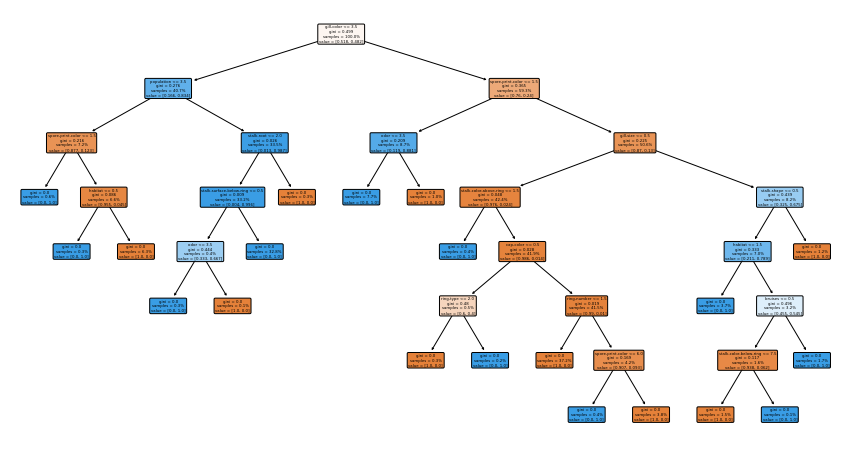

In [194]:
from sklearn import tree

plt.figure(figsize = (15,8))
tree.plot_tree(clf.fit(x, y), feature_names = cols, filled = True, precision = 3, proportion = True, rounded = True)
plt.show()

**RANDOM FOREST**

In [195]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 20, criterion = 'gini', random_state = 1, max_depth = 3)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [196]:
y_pred = classifier.predict(X_test)

In [197]:
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print(accuracy_score(y_test, y_pred))


[[1253   19]
 [  29 1137]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1272
           1       0.98      0.98      0.98      1166

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438

0.9803117309269893


In [198]:
feature_imp = pd.Series(classifier.feature_importances_, index = x.columns).sort_values(ascending = False)

In [199]:
feature_imp

gill-color                  0.164010
gill-size                   0.130959
stalk-surface-above-ring    0.129251
ring-type                   0.125981
population                  0.076562
spore-print-color           0.072544
odor                        0.065675
stalk-root                  0.062997
bruises                     0.042366
stalk-color-above-ring      0.034713
stalk-surface-below-ring    0.024503
gill-spacing                0.021675
habitat                     0.013268
ring-number                 0.007663
stalk-color-below-ring      0.007590
cap-color                   0.006882
veil-color                  0.006195
stalk-shape                 0.004198
cap-surface                 0.002966
veil-type                   0.000000
gill-attachment             0.000000
cap-shape                   0.000000
dtype: float64

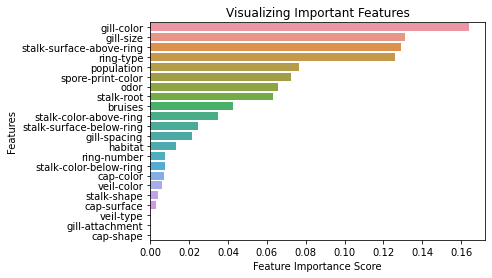

In [200]:
sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.show()

In [201]:
from sklearn.feature_selection import SelectFromModel
feat_sel = SelectFromModel(classifier, threshold = 0.1)
feat_sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini', max_depth=3,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=20, n_jobs=None,
                                                 oob_score=False,
                                                 ran

In [202]:
X_imp_train = feat_sel.transform(X_train)
X_imp_test = feat_sel.transform(X_test)

In [203]:
clf_imp = RandomForestClassifier(n_estimators = 20, criterion = 'gini', random_state = 1, max_depth = 7)
clf_imp.fit(X_imp_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [204]:
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.9803117309269893

In [205]:
y_imp_pred = clf_imp.predict(X_imp_test)
accuracy_score(y_test, y_imp_pred)

0.9548810500410172